In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv("telco-customer-churn.csv")
# To import dataset from system to jupyter notebook

In [3]:
df.info()
# gives information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# converting from object to numeric type

In [6]:
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [7]:
df.isnull().sum()
# checks for number of missing values in columns

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean())
df.isna().sum()
# replace missing values with the mean of the data

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
numerical_features = ["tenure","MonthlyCharges","TotalCharges"]
df_check = df[numerical_features]
df_check.describe()
Q1 = df_check.quantile(0.25)
Q3 = df_check.quantile(0.75)
IQR = Q3-Q1
((df_check < (Q1 - 1.5*IQR)) | (df_check > (Q3 + 1.5*IQR))).any()
# finding the outliers

tenure            False
MonthlyCharges    False
TotalCharges      False
dtype: bool

In [10]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)


fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)
fig.update_layout(
    title_text="Gender and Churn Distributions",
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()


In [11]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="Partner", barmode="group", title="<b>Chrun distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=900, height=700, bargap=0.1)
fig.show()

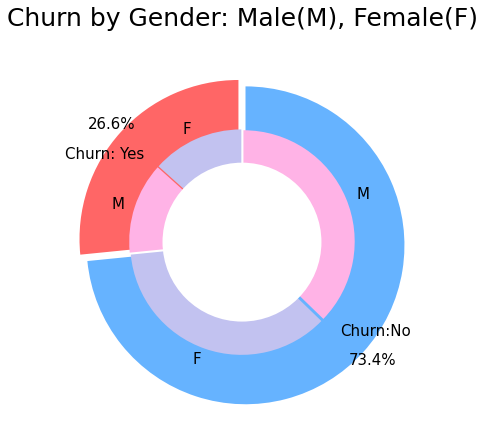

In [12]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn by Gender: Male(M), Female(F)', fontsize=25, y=1.1)

plt.axis('equal')
plt.tight_layout()
plt.show()

In [13]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="SeniorCitizen", title="<b>Chrun distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=900, height=700, bargap=0.1)
fig.show()

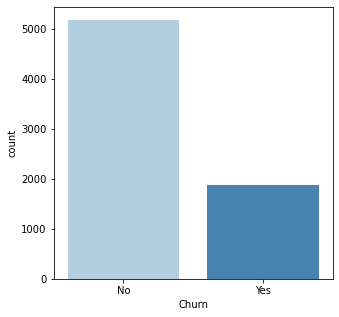

In [14]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x=df['Churn'],palette="Blues", linewidth=1)
plt.show()
# here the plot shows imbalance of data between churners and non churners 

In [15]:
from sklearn import preprocessing
le_features = ['gender','Partner', 'Dependents', 'Churn', 'PhoneService', 'PaperlessBilling', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
le = preprocessing.LabelEncoder()
for i in le_features:
    df[i] = le.fit_transform(df[i])
# applying label encoding to convert object datatype to numeric datatype

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   int32  
 8   InternetService   7043 non-null   int32  
 9   OnlineSecurity    7043 non-null   int32  
 10  OnlineBackup      7043 non-null   int32  
 11  DeviceProtection  7043 non-null   int32  
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   int32  
 14  StreamingMovies   7043 non-null   int32  
 15  Contract          7043 non-null   int32  
 16  PaperlessBilling  7043 non-null   int32  


In [17]:
df = df.drop(columns='customerID')
# dropping the customerid feature beacuse it does not effect the target variable 

<AxesSubplot:>

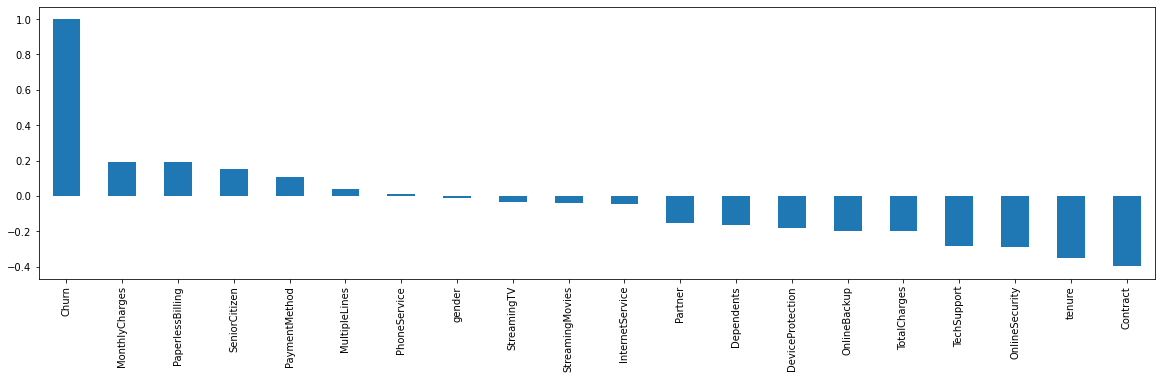

In [18]:
plt.figure(figsize=(20,15))
df.corr()['Churn'].sort_values(ascending=False).plot(kind='bar',figsize=(20,5))
# correlation analysis with respect to the target variable(churn)

In [19]:
corr_matrix = df.corr()
corr_matrix['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.199428
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

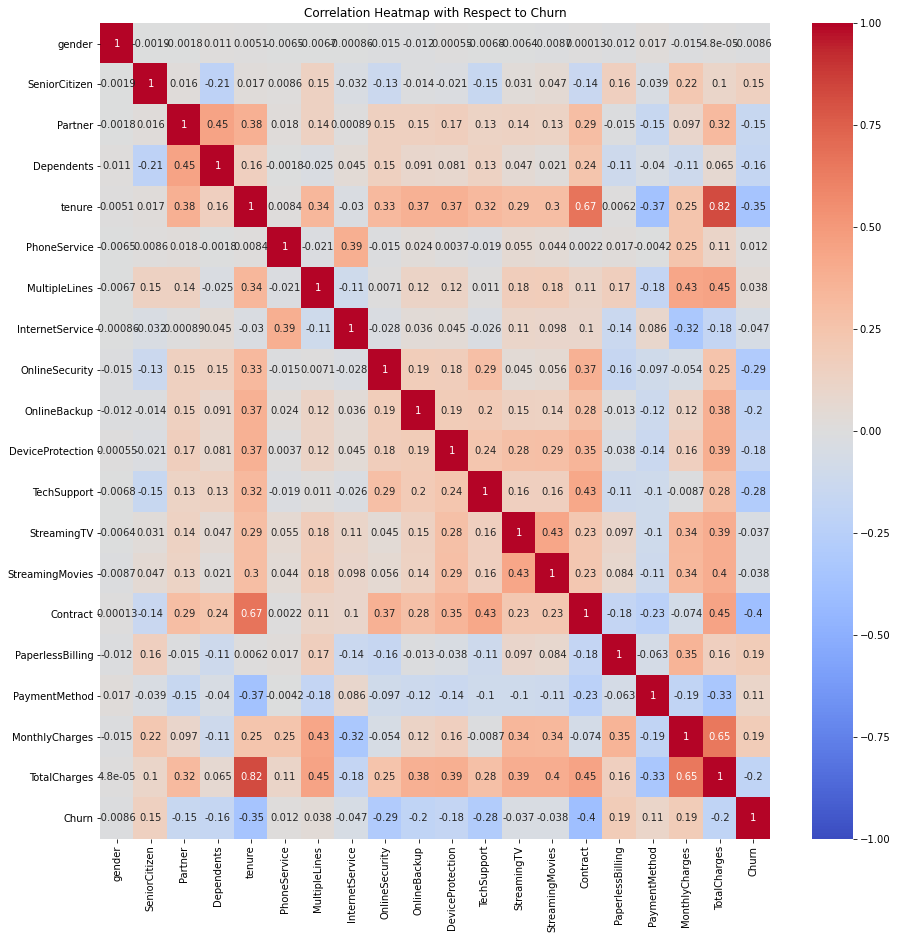

In [20]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap with Respect to Churn')
plt.show()

In [21]:
df = df.drop(columns=['gender','StreamingTV','PhoneService','MultipleLines','StreamingMovies','InternetService'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   int32  
 2   Dependents        7043 non-null   int32  
 3   tenure            7043 non-null   int64  
 4   OnlineSecurity    7043 non-null   int32  
 5   OnlineBackup      7043 non-null   int32  
 6   DeviceProtection  7043 non-null   int32  
 7   TechSupport       7043 non-null   int32  
 8   Contract          7043 non-null   int32  
 9   PaperlessBilling  7043 non-null   int32  
 10  PaymentMethod     7043 non-null   int32  
 11  MonthlyCharges    7043 non-null   float64
 12  TotalCharges      7043 non-null   float64
 13  Churn             7043 non-null   int32  
dtypes: float64(2), int32(10), int64(2)
memory usage: 495.3 KB


In [23]:
from sklearn.model_selection import train_test_split
x = df.drop(['Churn'],axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)
# splitting the data into training and testing data

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
X_test, y_test = oversample.fit_resample(X_test, y_test)

In [27]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1, y_pred

In [28]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_accuracy, lr_precision, lr_recall, lr_f1, y_pred_lr = evaluate_model(lr, X_test, y_test)

In [29]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_accuracy, nb_precision, nb_recall, nb_f1, y_pred_nb = evaluate_model(nb, X_test, y_test)

In [30]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_accuracy, knn_precision, knn_recall, knn_f1, y_pred_knn = evaluate_model(knn, X_test, y_test)

In [31]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_accuracy, dt_precision, dt_recall, dt_f1, y_pred_dt = evaluate_model(dt, X_test, y_test)

In [32]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_accuracy, rf_precision, rf_recall, rf_f1, y_pred_rf = evaluate_model(rf, X_test, y_test)

In [33]:
# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_accuracy, xgb_precision, xgb_recall, xgb_f1, y_pred_xgb = evaluate_model(xgb, X_test, y_test)

In [34]:
# Generate Classification Report
models = [lr, nb, knn, dt, rf, xgb]
model_names = ['Logistic Regression', 'Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'XGBoost']

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.81      0.72      0.76      1061
           1       0.75      0.83      0.78      1061

    accuracy                           0.77      2122
   macro avg       0.78      0.77      0.77      2122
weighted avg       0.78      0.77      0.77      2122

Confusion Matrix:
[[765 296]
 [185 876]]
AUC: 0.7733270499528747


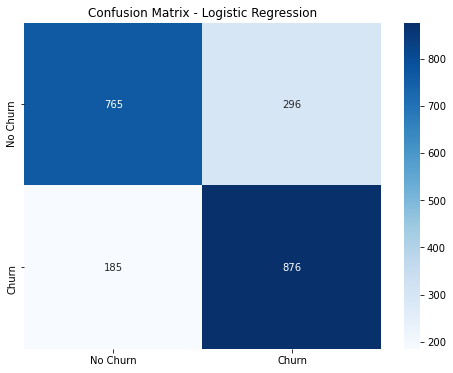

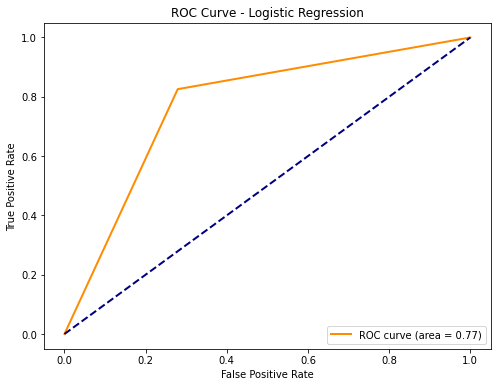


-----------------------------------

Classification Report for Naive Bayes:

              precision    recall  f1-score   support

           0       0.82      0.70      0.75      1061
           1       0.74      0.85      0.79      1061

    accuracy                           0.77      2122
   macro avg       0.78      0.77      0.77      2122
weighted avg       0.78      0.77      0.77      2122

Confusion Matrix:
[[738 323]
 [158 903]]
AUC: 0.7733270499528745


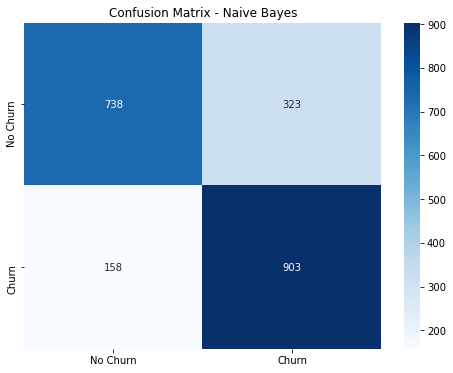

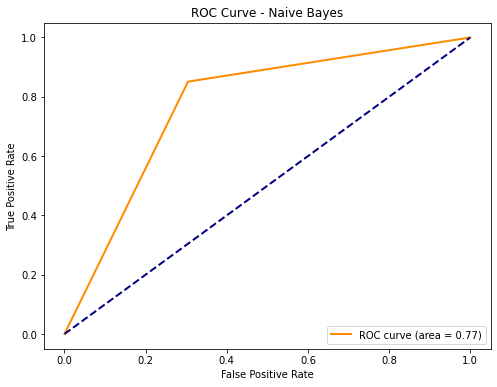


-----------------------------------

Classification Report for K-Nearest Neighbors:

              precision    recall  f1-score   support

           0       0.72      0.71      0.71      1061
           1       0.71      0.72      0.72      1061

    accuracy                           0.71      2122
   macro avg       0.71      0.71      0.71      2122
weighted avg       0.71      0.71      0.71      2122

Confusion Matrix:
[[749 312]
 [294 767]]
AUC: 0.7144203581526862


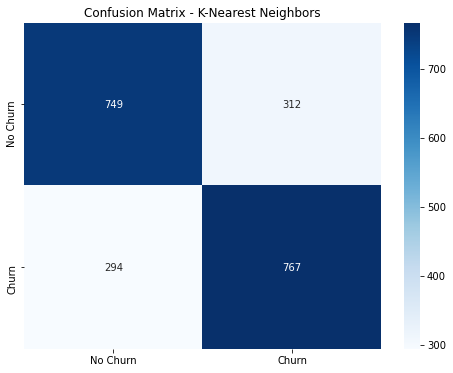

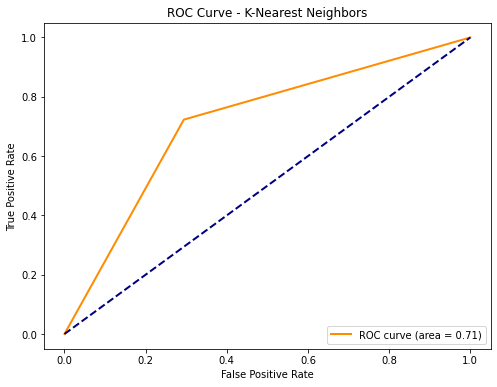


-----------------------------------

Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.73      0.77      0.75      1061
           1       0.75      0.71      0.73      1061

    accuracy                           0.74      2122
   macro avg       0.74      0.74      0.74      2122
weighted avg       0.74      0.74      0.74      2122

Confusion Matrix:
[[813 248]
 [304 757]]
AUC: 0.7398680490103675


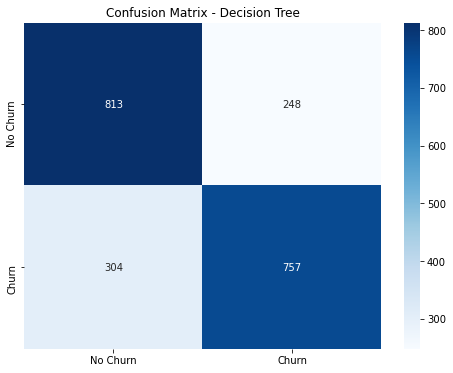

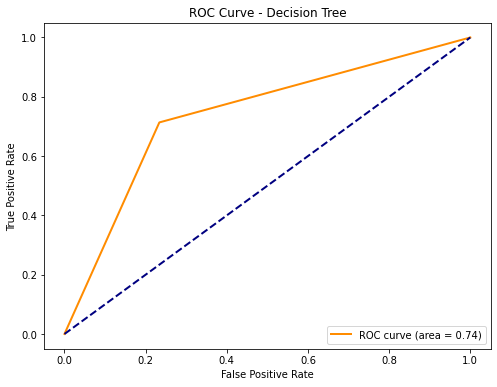


-----------------------------------

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1061
           1       0.82      0.76      0.79      1061

    accuracy                           0.79      2122
   macro avg       0.79      0.79      0.79      2122
weighted avg       0.79      0.79      0.79      2122

Confusion Matrix:
[[879 182]
 [257 804]]
AUC: 0.7931196983977379


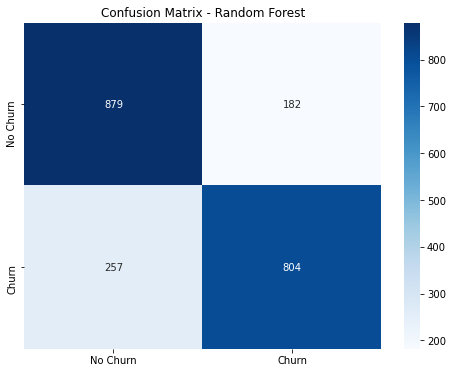

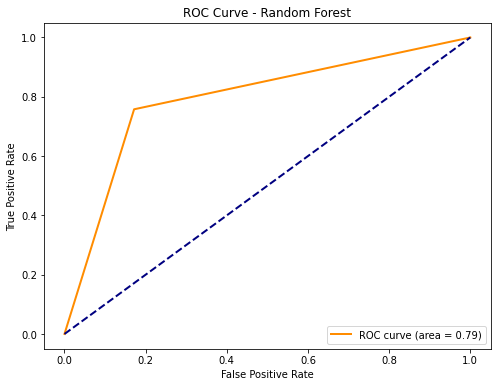


-----------------------------------

Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1061
           1       0.82      0.87      0.84      1061

    accuracy                           0.84      2122
   macro avg       0.84      0.84      0.84      2122
weighted avg       0.84      0.84      0.84      2122

Confusion Matrix:
[[862 199]
 [143 918]]
AUC: 0.8388312912346843


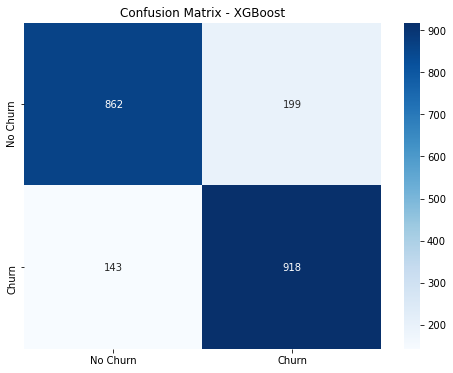

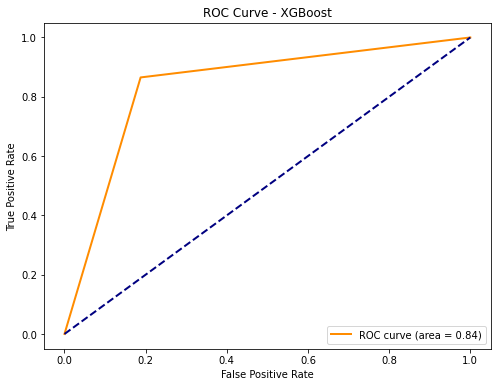


-----------------------------------



In [35]:
for i, model in enumerate(models):
    print(f"Classification Report for {model_names[i]}:\n")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix:\n{cm}")
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc_score = auc(fpr, tpr)
    print(f"AUC: {auc_score}")
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.title(f'Confusion Matrix - {model_names[i]}')
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_score))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_names[i]}')
    plt.legend(loc="lower right")
    plt.show()

    print("\n-----------------------------------\n")